In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
denorm = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.225]
    )
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
import net
import dataset

val_dataset = dataset.VocDataSet(split='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=1)

model = net.get_net()
checkpoint = torch.load('model_lr1e-05.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

Found 1449 images in the folder data/VOCdevkit/VOC2012


<All keys matched successfully>

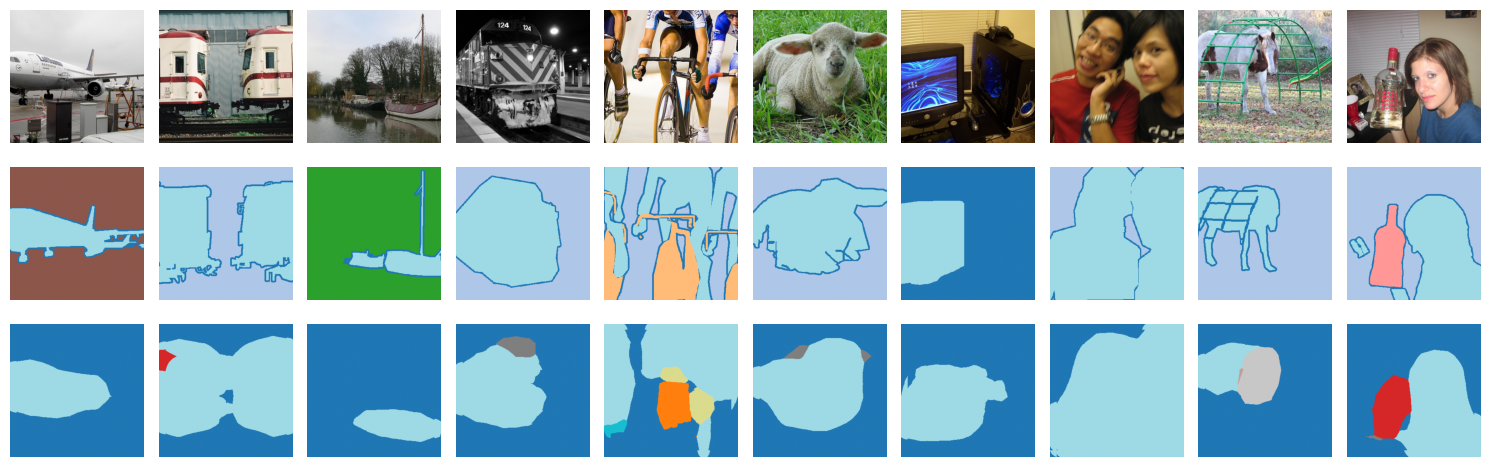

In [37]:
def get_images(n, model):
    total = 0
    total_images = []
    total_targets = []
    total_predictions = []
    model.eval()
    for images, targets, _ in val_loader:
        total_images.append(images)
        total_targets.append(targets)
        with torch.no_grad():
            outputs = model(images)
            predictions = F.softmax(outputs, dim=1).argmax(dim=1)
            total_predictions.append(predictions)
        total += len(images)
        if total >= n:
            break
    return torch.cat(total_images)[:n], torch.cat(total_targets)[:n], torch.cat(total_predictions)[:n]

def plot_cmp(n):
    images, targets, predictions = get_images(n, model)
    fig, axes = plt.subplots(3, n, figsize=(15, 5))
    for i in range(n):
        # Original image (denormalize for visualization)
        img = denorm(images[i]).permute(1, 2, 0).numpy().clip(0, 1)
        axes[0, i].imshow(img)
        # axes[0, i].set_title("Original Image")
        # Ground truth
        axes[1, i].imshow(targets[i], cmap='tab20')
        # axes[1, i].set_title("Ground Truth")
        # Prediction
        axes[2, i].imshow(predictions[i], cmap='tab20')
        # axes[2, i].set_title("Prediction")
    for ax in axes.flat:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_cmp(10)